In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import pylab as plt
from scipy.optimize import brentq


Bad key "axes.prop_cycle" on line 226 in
/Users/kadrlica/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution


In [2]:
def signal2noise(sig,bkg=0):
    """Signal-to-noise ratio (SNR) for given signal (and background)"""
    return sig/np.sqrt(sig+bkg)

def signal(snr,bkg=0):
    """Signal for give SNR (and background):
    sig**2 - snr**2 * sig - snr**2 * bkg = 0
    sig = (-b +/- sqrt(b**2 -4*a*c)))/2a
    """
    # Use the quadratic formula
    return (snr**2 + np.sqrt(snr**4 + 4 * snr**2 * bkg))/2.

In [3]:
# Desired snr threshold
SNR = 5
# Expected background counts
#BKG = 500
BKG = 5000
# Required signal counts
SIG = signal(SNR,BKG)
# Expected total number of counts
MU = SIG + BKG

print "SNR:",SNR
print "BKG:",BKG
print "SIG:",SIG
print "MU:",MU
print "SNR:",signal2noise(SIG,BKG)

SNR: 5
BKG: 5000
SIG: 366.274292452
MU: 5366.27429245
SNR: 5.0


In [4]:
def complete(sig,bkg=BKG,mu=MU):
    """Completeness, calculated as the probability of getting more 
    than MU counts for an input signal with strength 'sig'."""
    return 1 - stats.poisson.cdf(mu,sig+bkg)

def fn(sig,frac=0.95):
    """Completeness limit fitting function"""
    return complete(sig) - frac

def climit(frac=0.95):
    return brentq(fn,0,3*SIG,args=(frac,))

In [5]:
# Calculate the completeness limit
for q in [0.95,0.90,0.5]:
    c = climit(q)
    print '%i%% completeness limit: SIG=%.2f,'%(100*q, c),
    print 'SNR=%.2f,'%(signal2noise(c,BKG)),
    print 'DMAG=%.2f'%(-2.5*np.log10(c/SIG))

95% completeness limit: SIG=488.07, SNR=6.59, DMAG=-0.31
90% completeness limit: SIG=461.10, SNR=6.24, DMAG=-0.25
50% completeness limit: SIG=366.67, SNR=5.01, DMAG=-0.00


In [6]:
# Calculate the signal flux for S/N = 10
sig = signal(10,BKG)

# Calculate the magnitude differences
print 'mag(C=95%%)  - mag(S/N=5): %.2f'%(-2.5*np.log10(climit(0.95)/SIG))
print 'mag(S/N=10) - mag(C=95%%): %.2f'%(-2.5*np.log10(sig/climit(0.95)))
print 'mag(S/N=10) - mag(S/N=5): %.2f'%(-2.5*np.log10(sig/SIG))

mag(C=95%)  - mag(S/N=5): -0.31
mag(S/N=10) - mag(C=95%): -0.48
mag(S/N=10) - mag(S/N=5): -0.79


The conclusion from this is that the 95% completeness limit should be about 0.3 mag brighter than the S/N = 5 detection threshold (or 0.5 mag brighter than a S/N = 3 threshold). The difference in magnitude between the S/N = 5 detection threshold and the 95% completeness limit appears to be pretty insensitive to the number of background sources. In contrast, the magnitude difference between the 95% completeness limit and the S/N = 10 magnitude limit does depend on the background, ranging from -1.0 for low background analyses to -0.5 for background dominated analyses.

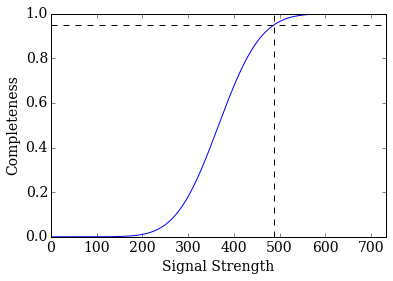

In [7]:
# Scan in the signal strength
scan = np.linspace(0,3*SIG,1e3)

plt.plot(scan,complete(scan))
plt.axhline(0.95,ls='--',color='k')
plt.axvline(climit(0.95),ls='--',color='k')

plt.xlim(0,2*SIG)
plt.xlabel("Signal Strength",fontsize=14)
plt.ylabel("Completeness",fontsize=14)